In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Задача 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [11]:
# y = b1 * x + b0, где x - влияющий параметр
X1= np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y1= np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b1 = (np.mean(X1 * Y1) - np.mean(Y1) * np.mean(X1)) / (np.mean(X1 ** 2) - np.mean(X1) ** 2)
b0 = np.mean(Y1) - b1 * np.mean(X1)
print(b1, b0)

2.620538882402765 444.1773573243596


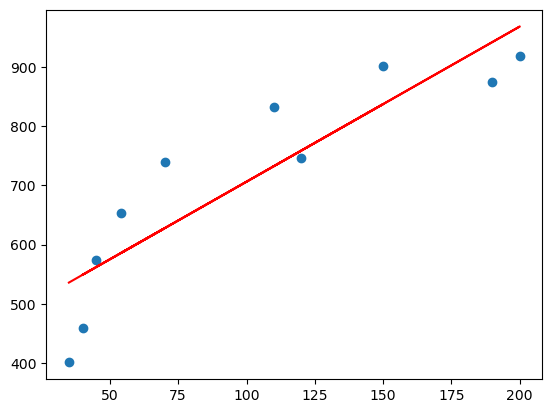

In [10]:
plt.scatter(X1, Y1)
plt.plot(X1, b1 * X1 + b0, color='red') #линия регресии
plt.show()

С intercept

In [9]:
X = X1.reshape((10, 1)) 
X2 = np.hstack([np.ones((10, 1)), X])
Y = Y1.reshape((10, 1))
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T @ Y) #dot - перемножение матриц
print(B)

[[444.17735732]
 [  2.62053888]]


Уравнение линейной регрессии имеет вид:

*y = 2.62 * x + 444.177*

In [13]:
y = b1 * X + b0
print(f'реальные значения скоринга: {Y1[:10]}')
print(f'предсказанные: {y[:10]}')

реальные значения скоринга: [401 574 874 919 459 739 653 902 746 832]
предсказанные: [[535.89621821]
 [562.10160703]
 [942.07974498]
 [968.2851338 ]
 [548.99891262]
 [627.61507909]
 [585.68645697]
 [837.25818968]
 [758.64202321]
 [732.43663439]]


### Задание 2. 
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [41]:
def mse(B1, X1, Y1, n):
    return np.sum(( B1 * X1 - Y1)) ** 2 / n
alpha = 1e-6 #скорость обучения
B1 = 0.1
n = 10
for i in range(10 ** 3):
    B1 -= alpha * (2/n) * np.sum(( B1 * X1 - Y1) * X1)
    if i % 100 == 0:
        print(B1, mse(B1, X1, Y1, n))

0.25952808 4672868.836557692
5.54537842245223 217853.54976661596
5.868748638669329 131810.8077273557
5.888531320728348 127244.99680579857
5.8897415574471985 126968.28841071585
5.889815595583751 126951.37011565862
5.889820124983314 126950.33514891358
5.889820402076462 126950.2718333306
5.88982041902807 126950.26795990097
5.889820420065112 126950.26772293777


### Задание 3.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [37]:
def mse(B1, B0, X1, Y1, n):
    return np.sum((B0 + B1 * X1 - Y1)) ** 2 / n
alpha = 1e-6 #скорость обучения
B0 = 1
B1 = 0.1
n = 10
for i in range(10 ** 4):
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1) * X1)
    B0 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1))
    if i % 1000 == 0:
        print(B1, B0, mse(B1, B0, X1, Y1, n))

0.25932528 1.001365208833216 4659469.257794535
5.880559652417007 1.2663589917844182 126213.74815367624
5.878906252800855 1.4909921852882244 126085.75581223071
5.877253691742817 1.7155114505495035 125957.89326772056
5.875601968821718 1.9399168453497884 125830.16038758177
5.873951083612473 2.1642084274412783 125702.55704032336
5.872301035690221 2.3883862545468975 125575.08309458639
5.870651824630306 2.612450384360264 125447.7384191463
5.869003450008296 2.8364008745457627 125320.52288291088
5.867355911399971 3.060237782738536 125193.4363549207
